# Price Volume Trend

https://www.barchart.com/education/technical-indicators/price_volume_trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# Input
symbol = 'AAPL'
index_symbol = '^GSPC'  # S&P 500 index symbol
start = '2018-09-01'
end = '2019-01-01'
n = 20  # Moving average period

# Read data for the symbol and the index
df = yf.download(symbol, start, end)
df_index = yf.download(index_symbol, start, end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106270,133332000
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777870,150479200
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000


In [3]:
# Calculate Percentage Change in Closing Price
df['Pct_Change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)

# Calculate PVT by multiplying Percentage Change by Volume
df['PVT_Change'] = df['Pct_Change'] * df['Volume']

# Add to yesterday's cumulative total to get today's PVT
df['PVT'] = df['PVT_Change'].cumsum()

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Pct_Change,PVT_Change,PVT
Date,,,,,,,,,
2018-09-04,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,NaN,NaN,NaN
2018-09-05,57.247501,57.417500,56.275002,56.717499,54.106270,133332000,-0.006525,-8.699659e+05,-8.699659e+05
2018-09-06,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,-0.016617,-2.279242e+06,-3.149208e+06
2018-09-07,55.462502,56.342499,55.177502,55.325001,52.777870,150479200,-0.008068,-1.214088e+06,-4.363296e+06
2018-09-10,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,-0.013421,-2.121357e+06,-6.484653e+06


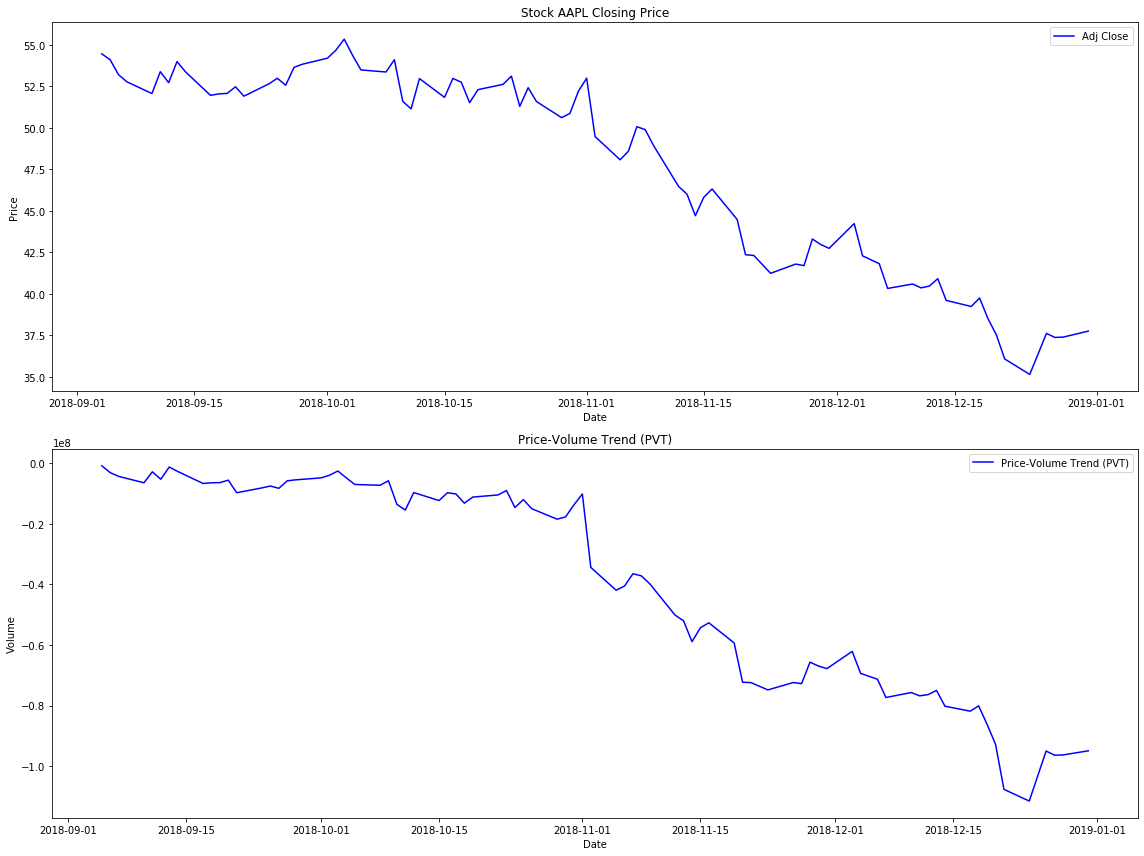

In [5]:
fig = plt.figure(figsize=(16, 12))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'], label='Adj Close', color='blue')
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['PVT'], label='Price-Volume Trend (PVT)', color='blue')
ax2.set_title('Price-Volume Trend (PVT)')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()

## Candlestick with Price Volume Trend

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_Change,PVT_Change,PVT,VolumePositive
0,736941.0,57.102501,57.294998,56.657501,57.090000,54.461617,109560400,NaN,NaN,NaN,False
1,736942.0,57.247501,57.417500,56.275002,56.717499,54.106270,133332000,-0.006525,-8.699659e+05,-8.699659e+05,False
2,736943.0,56.557499,56.837502,55.325001,55.775002,53.207153,137160000,-0.016617,-2.279242e+06,-3.149208e+06,False
3,736944.0,55.462502,56.342499,55.177502,55.325001,52.777870,150479200,-0.008068,-1.214088e+06,-4.363296e+06,False
4,736947.0,55.237499,55.462502,54.117500,54.582500,52.069561,158066000,-0.013421,-2.121357e+06,-6.484653e+06,False


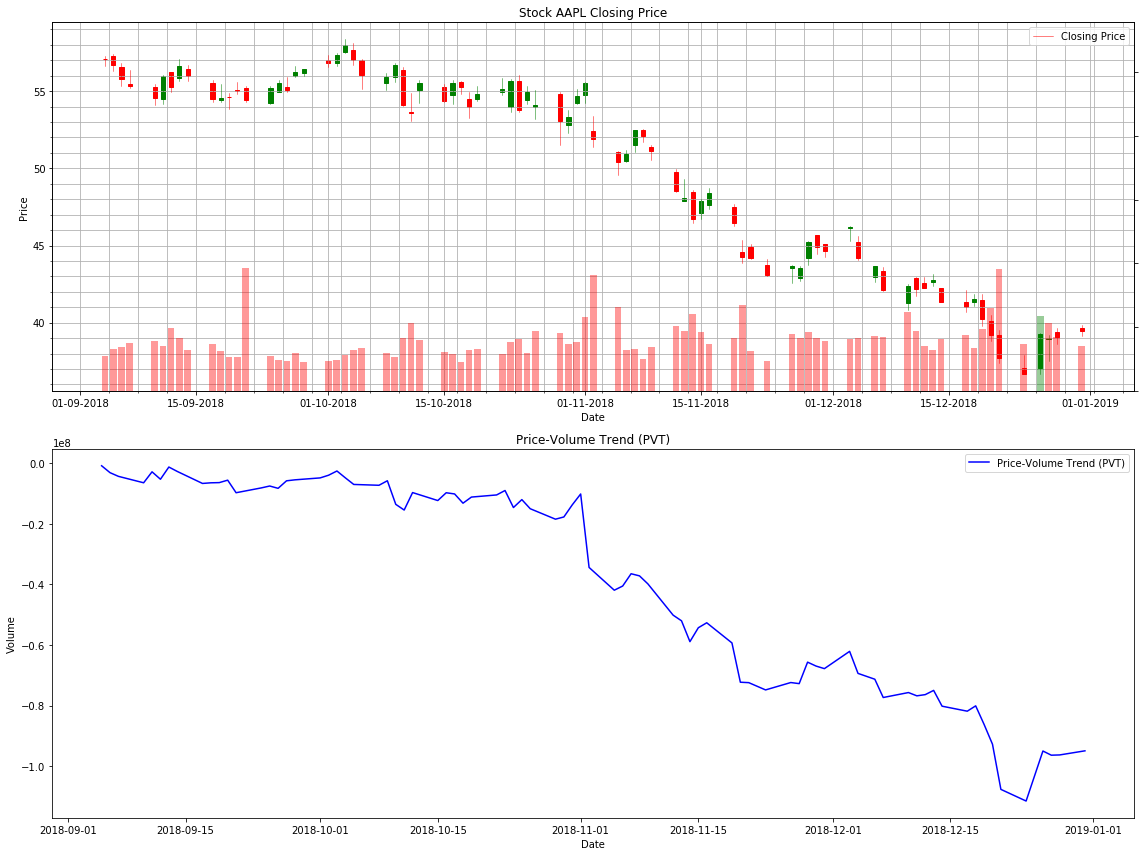

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(16,12))

ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3 * dfc.Volume.max())
ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
ax1.legend(['Closing Price'], loc='best')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['PVT'], label='Price-Volume Trend (PVT)', color='blue')
ax2.set_title('Price-Volume Trend (PVT)')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()